In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_recall_curve
from catboost import Pool, CatBoostClassifier, cv, CatBoostRegressor
import sklearn.metrics as metrics


In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
test_df=pd.read_csv('test.csv')

In [4]:
test_df['credit_line_utilization'].replace(',','.',regex=True, inplace=True)
test_df["credit_line_utilization"] = pd.to_numeric(test_df["credit_line_utilization"])
train_df['credit_line_utilization'].replace(',','.',regex=True, inplace=True)
train_df["credit_line_utilization"] = pd.to_numeric(train_df["credit_line_utilization"])

In [5]:
train_df.head()

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
0,1,66.0,NaN,4000.0,NaN,1.0,0.569108,0.054888,0.0,0.0,0.0,0
1,2,61.0,2.0,4000.0,6.0,1.0,0.297176,0.101950,0.0,0.0,0.0,0
2,3,31.0,2.0,3040.0,8.0,0.0,0.160145,1.227135,4.0,0.0,0.0,1
3,4,54.0,4.0,10218.0,5.0,0.0,0.067913,0.083278,0.0,0.0,0.0,0
4,5,29.0,0.0,4468.0,6.0,0.0,0.328261,0.317446,0.0,0.0,0.0,0


In [6]:
train_df.describe()

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
count,72161.000000,65017.000000,67945.000000,6.614500e+04,66007.000000,68355.000000,66553.000000,65815.000000,67966.000000,66316.000000,68540.000000,72161.000000
mean,36081.000000,51.388914,0.847009,6.624388e+03,8.756193,1.050296,26.524005,5.225040,0.393491,0.206074,0.224059,0.069470
std,20831.230725,14.414338,1.144038,1.084630e+04,5.198769,1.114420,399.253008,212.152963,3.680686,3.696260,3.634436,0.254253
min,1.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18041.000000,41.000000,0.000000,3.400000e+03,5.000000,0.000000,0.141302,0.035123,0.000000,0.000000,0.000000,0.000000
50%,36081.000000,51.000000,0.000000,5.400000e+03,8.000000,1.000000,0.294673,0.176500,0.000000,0.000000,0.000000,0.000000
75%,54121.000000,62.000000,2.000000,8.232000e+03,11.000000,2.000000,0.480989,0.578536,0.000000,0.000000,0.000000,0.000000
max,72161.000000,103.000000,13.000000,1.560100e+06,57.000000,25.000000,61106.500000,29110.000000,98.000000,98.000000,98.000000,1.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72161 entries, 0 to 72160
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Id                                                72161 non-null  int64  
 1   age                                               65017 non-null  float64
 2   number_dependent_family_members                   67945 non-null  float64
 3   monthly_income                                    66145 non-null  float64
 4   number_of_credit_lines                            66007 non-null  float64
 5   real_estate_loans                                 68355 non-null  float64
 6   ratio_debt_payment_to_income                      66553 non-null  float64
 7   credit_line_utilization                           65815 non-null  float64
 8   number_of_previous_late_payments_up_to_59_days    67966 non-null  float64
 9   number_of_previou

In [8]:
#droppping id column
train_df.drop(labels='Id', axis=1, inplace=True)

In [9]:
features = train_df.columns.difference(['defaulted_on_loan']).values.tolist()
features

['age',
 'credit_line_utilization',
 'monthly_income',
 'number_dependent_family_members',
 'number_of_credit_lines',
 'number_of_previous_late_payments_90_days_or_more',
 'number_of_previous_late_payments_up_to_59_days',
 'number_of_previous_late_payments_up_to_89_days',
 'ratio_debt_payment_to_income',
 'real_estate_loans']

In [10]:
X = train_df[features]
y = train_df['defaulted_on_loan']
numeric_features = features
#imputation using Simple Imputer
X[numeric_features]=SimpleImputer(strategy='mean').fit_transform(X[numeric_features])

<ipython-input-10-021bc8c4fd01>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features]=SimpleImputer(strategy='mean').fit_transform(X[numeric_features])
c:\users\ali yusifov\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\ali yusifov\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1234)

After I tried different classification methods including KNN Classification, Logistic Regression, Decision Tree Classification, Boosting methods, I got best score with CatBoostClassification. I applied grid search cv to get best parameter for this Classification method. I got lower marks with other methods so I did not add them into my notebook.

In [12]:
#Making model with CatBoostClassifier
cate_features_index = np.where(X.dtypes != float)[0]
model=CatBoostClassifier(random_seed=1234, iterations=1600, learning_rate=0.0097, l2_leaf_reg=3,eval_metric='AUC',use_best_model=True)

In [13]:
# Using GridSearch for finding best parameters for CatBoostClassification
# model_params = {  
#     'depth': [8, 9, 10, 12],
#     'learning_rate': [0.01, 0.02, 0.03],
#     'iterations':[1000, 1200, 1400, 1600 ],
#     'l2_leaf_reg':[1, 2, 3, 4, 5]
#          }
# model_grid = GridSearchCV(estimator=model, param_grid=model_params)

# It takes long time so I used the best params I got
# model_grid.fit(X_train, y_train)
# model_grid.best_params_

In [14]:
#After getting best values we need to remake our model with best parameter values
model=CatBoostClassifier(random_seed=1234,depth=9, iterations=1600, learning_rate=0.01, l2_leaf_reg=3,use_best_model=True)

In [15]:
#fitting
model.fit(X_train, y_train, cat_features=cate_features_index,eval_set=(X_test,y_test))

0:	learn: 0.6801280	test: 0.6800505	best: 0.6800505 (0)	total: 180ms	remaining: 4m 47s
1:	learn: 0.6673613	test: 0.6672215	best: 0.6672215 (1)	total: 211ms	remaining: 2m 48s
2:	learn: 0.6542643	test: 0.6540639	best: 0.6540639 (2)	total: 230ms	remaining: 2m 2s
3:	learn: 0.6409789	test: 0.6406753	best: 0.6406753 (3)	total: 260ms	remaining: 1m 43s
4:	learn: 0.6296918	test: 0.6293115	best: 0.6293115 (4)	total: 289ms	remaining: 1m 32s
5:	learn: 0.6183215	test: 0.6178825	best: 0.6178825 (5)	total: 306ms	remaining: 1m 21s
6:	learn: 0.6061871	test: 0.6056919	best: 0.6056919 (6)	total: 335ms	remaining: 1m 16s
7:	learn: 0.5961222	test: 0.5955366	best: 0.5955366 (7)	total: 345ms	remaining: 1m 8s
8:	learn: 0.5851176	test: 0.5844819	best: 0.5844819 (8)	total: 374ms	remaining: 1m 6s
9:	learn: 0.5744338	test: 0.5737044	best: 0.5737044 (9)	total: 411ms	remaining: 1m 5s
10:	learn: 0.5635134	test: 0.5627128	best: 0.5627128 (10)	total: 441ms	remaining: 1m 3s
11:	learn: 0.5532619	test: 0.5524367	best: 0.5

In [16]:
y_pre=model.predict(X_test)
y_prob=model.predict_proba(X_test)

In [17]:
#classification report
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     16828
           1       0.58      0.16      0.25      1213

    accuracy                           0.94     18041
   macro avg       0.76      0.58      0.61     18041
weighted avg       0.92      0.94      0.92     18041



In [18]:
#confusion matrix
print(confusion_matrix(y_test, y_pre))

[[16685   143]
 [ 1015   198]]


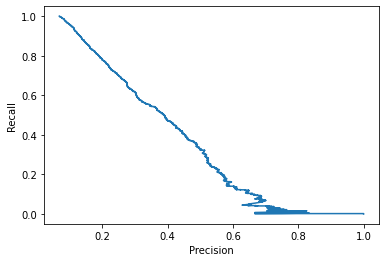

In [19]:
#Plotting recall and precision curve
precisions, recalls, thresholds = precision_recall_curve(y_test,y_prob[:, 1])
plt.plot(precisions, recalls)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

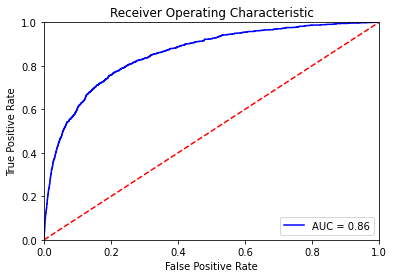

In [20]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

#plotting ROC and getting AUC value
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

With this model we get our AUC score 0.86 which is quite good.

In [44]:
#Fitting our test data to the model and making submission
X = test_df[features]
#numerical values imputation
X[numeric_features]=SimpleImputer(strategy='median').fit_transform(X[numeric_features])
#trial check
trial = model.predict_proba(X)[:,1:]
data_frame=pd.DataFrame(trial)
data_frame.index = data_frame.index+1 
data_frame.columns=['Predicted']
data_frame.to_csv('mypredictionMK.csv', index_label='Id')

<ipython-input-44-230eb52172be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_features]=SimpleImputer(strategy='median').fit_transform(X[numeric_features])
c:\users\ali yusifov\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\ali yusifov\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Although, I tried different techniques to get rid of outliers(Isolation Forest and manually), balancing for 'defaulted_on_loan' column(SMOTE, undersampling, oversampling) I got lower score on kaggle. So I only used CatBoost Classification model with best parameters from grid search cv. 